In [19]:
#Loading in Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn import metrics

In [2]:
conda install py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/kyleguillen/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    libxgboost-1.5.0           |       he9d5cce_1         1.2 MB
    py-xgboost-1.5.0           |   py39hecd8cb5_1         166 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/osx-64::libxgboost-1.5.0-he9d5cce_1
  py-xgboost         pkgs/main/osx-64::py-xgboost-1.5.0-py39hecd8cb5_1



_py-xgboost-mutex-2. | 8 KB      | ##################################### | 100% 
py-xgboost-1.5.0     | 166 KB    | ##########

In [20]:
#read in Data
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [21]:
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [22]:
#Segmenting data into training and testing data as well as isolating independent variables from response variable
Train_Data = data[data.flag == "train"]
Y_Train = Train_Data["y"]
Test_Data = data[data.flag == "test"]
Y_Test = Test_Data["y"]
Train_Data_X = Train_Data.drop(columns = ["flag","y"])
Test_Data_X = Test_Data.drop(columns = ["flag","y"])

In [23]:
#convert categorical variables into numeric encodings using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Train_Coded = enc.fit_transform(Train_Data_X)
Train_Coded
Test_Coded = enc.transform(Test_Data_X)
Test_Coded

<16281x36 sparse matrix of type '<class 'numpy.float64'>'
	with 146529 stored elements in Compressed Sparse Row format>

In [24]:
%matplotlib inline

In [26]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

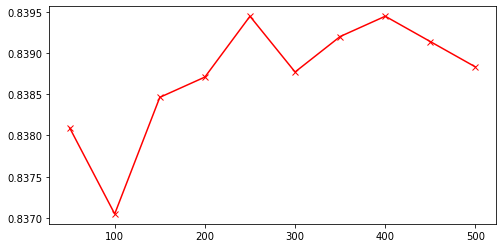

In [27]:
#for loop to test multiple options for n_estimator RandomForest
Acc_Results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators= estimator, random_state=4)
    model.fit(Train_Coded, Y_Train)
    y_pred = model.predict(Test_Coded)
    acc = metrics.accuracy_score(Y_Test, y_pred)
    Acc_Results.append(acc)
    
plt.figure(figsize=(8,4))
pd.Series(Acc_Results, n_estimators).plot(color = "red", marker = "x")

In [67]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor

50
100
150
200
250
300
350
400
450
500


<AxesSubplot:>

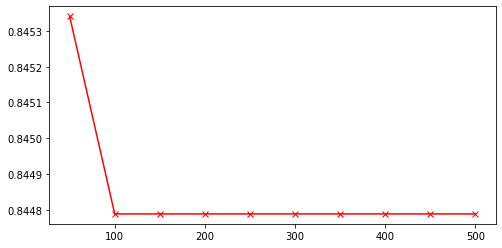

In [29]:
#for loop to test multiple options for n_estimator AdaBoost
Acc_Results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for estimator in n_estimators:
    AdaModel = AdaBoostClassifier(n_estimators= estimator, random_state=4)
    AdaModel.fit(Train_Coded, Y_Train)
    y_pred = AdaModel.predict(Test_Coded)
    acc = metrics.accuracy_score(Y_Test, y_pred)
    Acc_Results.append(acc)
    
plt.figure(figsize=(8,4))
pd.Series(Acc_Results, n_estimators).plot(color = "red", marker = "x")

<AxesSubplot:>

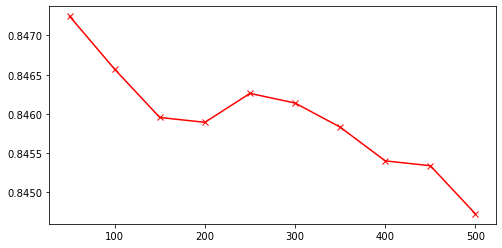

In [69]:
#for loop to test multiple options for n_estimator GradientBoost
Acc_Results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for estimator in n_estimators:
    GBModel = GradientBoostingClassifier(n_estimators= estimator, random_state=4, max_depth=)
    GBModel.fit(Train_Coded, Y_Train)
    y_pred = GBModel.predict(Test_Coded)
    acc = metrics.accuracy_score(Y_Test, y_pred)
    Acc_Results.append(acc)
    
plt.figure(figsize=(8,4))
pd.Series(Acc_Results, n_estimators).plot(color = "red", marker = "x")

In [27]:
conda install libomp

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - libomp

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [31]:
import xgboost as xgb

In [32]:
DTrain = xgb.DMatrix(Train_Coded, label=Y_Train)
DTest = xgb.DMatrix(Test_Coded, label=Y_Test)

/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

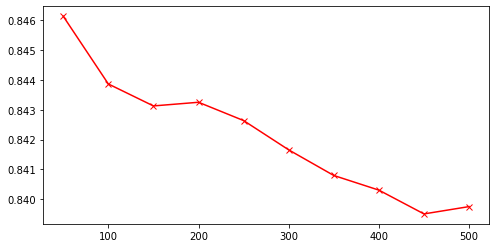

In [37]:
#for loop to test multiple options for n_estimator XG Boost
Acc_Results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for estimator in n_estimators:
    XGModel = xgb.XGBClassifier(n_estimators = estimator, random_state = 4)
    XGModel.fit(Train_Coded, Y_Train)
    y_pred = XGModel.predict(Test_Coded)
    acc = metrics.accuracy_score(Y_Test, y_pred)
    Acc_Results.append(acc)
    
plt.figure(figsize=(8,4))
pd.Series(Acc_Results, n_estimators).plot(color = "red", marker = "x")

In [79]:
#Step 5, compare performance between models with n_estimators set to 200
CompTable = pd.DataFrame(index=['Accuracy', 'AUC'], columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'])
n_est = 200

#Random Forest
model = RandomForestClassifier(n_estimators= n_est, random_state=4, max_depth=12)
model.fit(Train_Coded, Y_Train)
y_pred = model.predict(Test_Coded)
y_prob = model.predict_proba(Test_Coded)
acc = metrics.accuracy_score(Y_Test, y_pred)
auc = metrics.roc_auc_score(Y_Test, y_prob[:,1])
CompTable['Random Forest'][0] = acc
CompTable['Random Forest'][1] = auc

#AdaBoost
AdaModel = AdaBoostClassifier(n_estimators= n_est, random_state=4, base_estimator = DecisionTreeClassifier(max_depth=12))
AdaModel.fit(Train_Coded, Y_Train)
y_pred = AdaModel.predict(Test_Coded)
y_prob = AdaModel.predict_proba(Test_Coded)
acc = metrics.accuracy_score(Y_Test, y_pred)
auc = metrics.roc_auc_score(Y_Test, y_prob[:,1])
CompTable['AdaBoost'][0] = acc
CompTable['AdaBoost'][1] = auc

#Gradient Boost
GBModel = GradientBoostingClassifier(n_estimators= n_est, random_state=4, max_depth=12)
GBModel.fit(Train_Coded, Y_Train)
y_pred = GBModel.predict(Test_Coded)
y_prob = GBModel.predict_proba(Test_Coded)
acc = metrics.accuracy_score(Y_Test, y_pred)
auc = metrics.roc_auc_score(Y_Test, y_prob[:,1])
CompTable['Gradient Boost'][0] = acc
CompTable['Gradient Boost'][1] = auc

#XG Boost
DTrain = xgb.DMatrix(Train_Coded, label=Y_Train)
DTest = xgb.DMatrix(Test_Coded, label=Y_Test)
XGModel = xgb.XGBClassifier(n_estimators = n_est, random_state = 4, max_depth = 12)
XGModel.fit(Train_Coded, Y_Train)
y_pred = XGModel.predict(Test_Coded)
y_prob = XGModel.predict_proba(Test_Coded)
acc = metrics.accuracy_score(Y_Test, y_pred)
auc = metrics.roc_auc_score(Y_Test, y_prob[:,1])
CompTable['XGB'][0] = acc
CompTable['XGB'][1] = auc

/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
print(CompTable)
print('~~~~~~~~~~~~~~')
print('Common Hyper Parameters:')
print('Random Forest:', 'Max_Depth =', model.get_params()['max_depth'], 'n_estimators:', 
      model.get_params()['n_estimators'], 'Random State:', model.get_params()['random_state'])
print('AdaBoost:', 'Max_Depth =', AdaModel.get_params()['base_estimator__max_depth'], 'n_estimators:', 
      AdaModel.get_params()['n_estimators'], 'Random State:', AdaModel.get_params()['random_state'])
print('Gradient Boost:', 'Max_Depth =', GBModel.get_params()['max_depth'], 'n_estimators:', 
      GBModel.get_params()['n_estimators'], 'Random State:', GBModel.get_params()['random_state'])
print('XG Boost:', 'Max_Depth =', XGModel.get_params()['max_depth'], 'n_estimators:', 
      XGModel.get_params()['n_estimators'], 'Random State:', XGModel.get_params()['random_state'])

         Random Forest  AdaBoost Gradient Boost       XGB
Accuracy      0.845894  0.836374       0.837295  0.835207
AUC           0.896039  0.861568       0.870385  0.879302
~~~~~~~~~~~~~~
Common Hyper Parameters:
Random Forest: Max_Depth = 12 n_estimators: 200 Random State: 4
AdaBoost: Max_Depth = 12 n_estimators: 200 Random State: 4
Gradient Boost: Max_Depth = 12 n_estimators: 200 Random State: 4
XG Boost: Max_Depth = 12 n_estimators: 200 Random State: 4
